# RANDOM FOREST CLASSIFICATION 
---

```julia
versioninfo() # -> v"1.11.1"
```

In [1]:
cd(@__DIR__)

In [2]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


Import librairies

In [3]:
using CSV, DataFrames, Plots
using MLJ

Read dataset -> `df`

In [4]:
df = CSV.read("../../Datasets/Social_Network_Ads.csv", DataFrame)

Row,Age,EstimatedSalary,Purchased
,Int64,Int64,Int64
1,19,19000,0
2,35,20000,0
3,26,43000,0
4,27,57000,0
5,19,76000,0
6,27,58000,0
7,27,84000,0
8,32,150000,1
9,25,33000,0


Unpack data

In [5]:
features, target = unpack(df,
                          ==(:EstimatedSalary),
                          ==(:Purchased);
                          :EstimatedSalary => Continuous,
                          :Purchased => Multiclass)

([19000.0, 20000.0, 43000.0, 57000.0, 76000.0, 58000.0, 84000.0, 150000.0, 33000.0, 65000.0  …  33000.0, 23000.0, 45000.0, 42000.0, 59000.0, 41000.0, 23000.0, 20000.0, 33000.0, 36000.0], CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  1, 1, 1, 1, 0, 1, 1, 1, 0, 1], [19, 35, 26, 27, 19, 27, 27, 32, 25, 35  …  48, 47, 45, 60, 39, 46, 51, 50, 36, 49])

Scatter plot

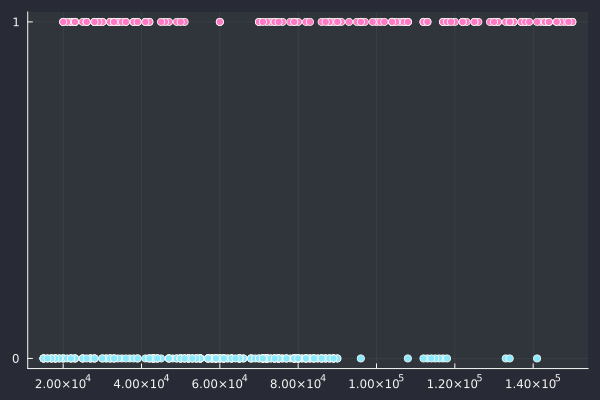

In [6]:
scatter(features, target; group=target, legend=false)

Convert data to tabular format

In [7]:
x = Tables.table(features);
y = target;

Bind an instance `rfc_` model to training data

In [8]:
RFC = @load RandomForestClassifier pkg=DecisionTree
rfc_ = RFC(max_depth=5, min_samples_split=3)
rfc = machine(rfc_, x, y) |> fit!

[ Info: For silent loading, specify `verbosity=0`. 


import MLJDecisionTreeInterface ✔


[ Info: Training machine(RandomForestClassifier(max_depth = 5, …), …).


trained Machine; caches model-specific representations of data
  model: RandomForestClassifier(max_depth = 5, …)
  args: 
    1:	Source @083 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @662 ⏎ AbstractVector{Multiclass{2}}


You may want to see [DecisionTree.jl](https://github.com/bensadeghi/DecisionTree.jl) and the unwrapped model type [`MLJDecisionTreeInterface.DecisionTree.RandomForestClassifier`](@ref).

Evaluate the model

In [9]:
evaluate!(rfc)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:05


PerformanceEvaluation object with these fields:
  model, measure, operation,
  measurement, per_fold, per_observation,
  fitted_params_per_fold, report_per_fold,
  train_test_rows, resampling, repeats
Extract:
┌──────────────────────┬───────────┬─────────────┐
│ measure              │ operation │ measurement │
├──────────────────────┼───────────┼─────────────┤
│ LogLoss(             │ predict   │ 2.4         │
│   tol = 2.22045e-16) │           │             │
└──────────────────────┴───────────┴─────────────┘
┌──────────────────────────────────────────┬─────────┐
│ per_fold                                 │ 1.96*SE │
├──────────────────────────────────────────┼─────────┤
│ [0.997, 0.331, 0.631, 0.956, 5.42, 6.19] │ 2.32    │
└──────────────────────────────────────────┴─────────┘
